# Project: Investigating Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### In this analysis we are trying to analyize the reasons behind appointment no-shows in a dataset.
### After examining the data, we asked the following questions:

<br>
Research Question 1: Which Gender is most likely to have a No-Show?<br>
<br>
Research Question 2: Is Time waited after scheduling related to No-Shows?<br>
<br>
Research Question 3: Patients with history of Alcoholism resulted in No-Shows?<br>
<br>
Research Question 4: Diabetes patients most likely having No-Shows?<br>
<br>
Research Question 5: Hypertension patients most likely having a No-Show?<br>
<br>
Research Question 6: Does sending a reminder through an SMS before the appointment affect No-show frequency?<br>
<br>
Research Question 7: Patients that have a scholarship will most likely No-show as they are not paying full expense?<br>
<br>
Research Question 8: Which Age group would most likely result in a No-Show?<br>
<br>
Research Question 9: The appointment being a weekday or weekend affects the frequency of No-shows?<br>
<br>
Research Question 10: Appointment time (early morning or night) affects the amount of No-shows? (before 12 pm and after 6 pm)<br>
<br>
Research Question 11: Location of the hospital affects the amount of No-shows? (Accessability)<br>
<br>
Research Question 12: Which age group are most likely to apply for a scholarship?<br>
<br>
Research Question 13: What is the relation between Age and the patient having hypertension/diabetes/alcoholism? <br>
<br>
Research Question 14: Location of the hospital affects the amount of No-shows for seniors? (Accessability)<br>
<br>
Research Question 15: Location of the hospital affects the amount of No-shows for Handicapped? (Accessability)<br>
<br>
Research Question 16: Adults who have Appointments before 6 pm would most likely result to a No-show due to work?<br>
<br>
Research Question 17: Infants who have Appointments before 3 pm would most likely result to a No-show due to school work?<br>


#### Import Packages

In [1]:
#Used packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

>### Reading data

In [2]:
#   types and look for instances of missing or possibly errant data.
raw_df = pd.read_csv('collected_data.csv')
raw_df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


>#### Dataframe Investigation (Missing data, bad practices, etc.)

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>**-Columns to be dropped:**<br>
    - AppointmentId<br>
 **-We can check using "PatiendId" if they have a history of No-shows for future predictions**

>**-We need to rename columns:**<br>
    1- Hipertension ⇒　Hypertension<br>
    2- Handcap ⇒　Handicap<br>

>**-We need to convert the "No-show" values to 0 and 1 where 0 is "No" and 1 is "Yes"**<br>
**-We need to convert the "ScheduledDay" and "AppointmentDay" values to Datetime**<br>
**-We need to convert the "Handicap", "Diabetes", "Hypertension", "Alcoholism", "SMS_received", "No-show" and " Scholarship"  values to  assume True or False (aka 1 and 0) as mentioned in the Kaggle info**<br>

In [4]:
raw_df.isnull().sum()
#No missing Data

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
raw_df.duplicated().sum()
#No Duplicated data

0

>**-No missing or duplicated data (Including Patient ID), therefore, we can drop PatientId too**<br>

In [6]:
raw_df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

>**-The content of the project on Kaggle says that Handicapping is True or False so We can assume that 0 and 1 are the correct indications of handicapped and 2,3,4 are wrong values to be dropped.**<br>

In [7]:
raw_df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [8]:
raw_df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

>**There is a negative value in Age (To be dropped). Also, for the 0 Age, we can assume they are newborns**

In [9]:
raw_df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [10]:
raw_df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

>**Change 'No-show' to "No_show"**

>##### -Modify dates to Datetime

### Data Cleaning:

>#### **Drops:**<br>
>###### **1-Drop (-1) Age Index**
>###### **2-Drop Handicapped values > 1**
>###### **3-Dropping irrelevant Columns**

In [11]:
#Drop Age (-1)
raw_df.drop(raw_df[raw_df['Age']<0].index, inplace=True)

In [12]:
#Drop Handicapped values > 1
raw_df.drop(raw_df[raw_df['Handcap']>1].index, inplace=True)

In [13]:
#Drop Unused columns
raw_df.drop(['AppointmentID','PatientId'],axis=1,inplace=True)

>#### **Renames:**<br>
>###### **1- Hipertension ⇒　Hypertension**
>###### **2- Handcap ⇒　Handicap**
>###### **3- No-show ⇒　No_show**

In [14]:
raw_df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap'},inplace=True)

In [15]:
raw_df.rename(columns={'No-show':'No_show'},inplace=True)

>#### **Data No_show values change:**<br>
>###### **1- Yes ⇒　1**
>###### **2- No ⇒　0**

In [16]:
raw_df.No_show.replace({'Yes':1,'No':0},inplace = True)

>#### **Change dates to DateTime for:**<br>
>###### **1- AppointmentDay**
>###### **2- ScheduledDay**
>#### **We also want to check if there is an error if AppointmentDay is after ScheduledDay (Input Error)**

In [17]:
raw_df['AppointmentDay'] = pd.to_datetime(raw_df['AppointmentDay'])

In [18]:
raw_df['ScheduledDay'] = pd.to_datetime(raw_df['ScheduledDay'])

> #### We add new column called AppSch_TimeDiff. If that time is Negative, we drop the related index**

In [19]:
raw_df['AppSch_TimeDiff'] = raw_df['AppointmentDay'] - raw_df['ScheduledDay']

In [20]:
raw_df.AppSch_TimeDiff.describe()
#we found negative values.

count                     110327
mean      9 days 17:13:17.575779
std      15 days 05:55:31.858451
min            -7 days +10:10:40
25%            -1 days +15:41:36
50%              3 days 11:34:22
75%      14 days 07:43:56.500000
max            178 days 13:19:01
Name: AppSch_TimeDiff, dtype: object

In [21]:
###Ignore this cell###

#>**We need to convert the Datetime to seconds for further calculations**
#Values are strings, so we can't use the following code:
## raw_df.drop(raw_df[raw_df.AppSch_TimeDiff < -1].index, inplace = True)

## If Appointment day - scheduled day smaller than 0, means it has input error.
## Assuming they allow same day appointment.
## We convert it to float of seconds using the following

#raw_df['AppSch_TimeDiff_Sec'] = raw_df['AppSch_TimeDiff'].dt.total_seconds() / (24 * 60 * 60)

In [22]:
raw_df.drop(raw_df[raw_df.ScheduledDay > raw_df.AppointmentDay].index, inplace = True)

In [23]:
## Return time difference to only days
raw_df['AppSch_TimeDiff'] = raw_df['AppSch_TimeDiff'].apply(lambda x: x.days)

In [24]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71837 entries, 5 to 110526
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Gender           71837 non-null  object             
 1   ScheduledDay     71837 non-null  datetime64[ns, UTC]
 2   AppointmentDay   71837 non-null  datetime64[ns, UTC]
 3   Age              71837 non-null  int64              
 4   Neighbourhood    71837 non-null  object             
 5   Scholarship      71837 non-null  int64              
 6   Hypertension     71837 non-null  int64              
 7   Diabetes         71837 non-null  int64              
 8   Alcoholism       71837 non-null  int64              
 9   Handicap         71837 non-null  int64              
 10  SMS_received     71837 non-null  int64              
 11  No_show          71837 non-null  int64              
 12  AppSch_TimeDiff  71837 non-null  int64              
dtypes: datetime64[n

In [25]:
### Save cleaned data to new CSV file
raw_df.to_csv('cleaned_data.csv')

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which Gender is most likely to have a No-Show?

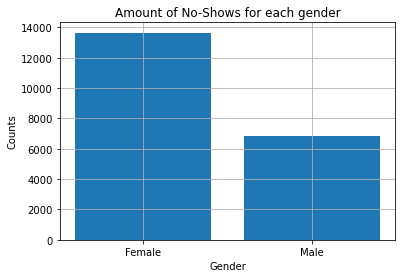

In [26]:
no_show_gender = raw_df[raw_df['No_show'] == 1].groupby('Gender').count().iloc[:, 0]
plt.bar([1,2], no_show_gender, tick_label=['Female', 'Male'])
plt.title('Amount of No-Shows for each gender');
plt.grid()
plt.xlabel('Gender');
plt.ylabel('Counts');

#### It seems that females are more inclined to not show to the appointment

### Research Question 2: Is Time waited after scheduling related to No-Shows?

In [27]:
no_show_wait = raw_df[raw_df['No_show'] == 1].groupby('AppSch_TimeDiff').count().iloc[:, 0]
raw_df['AppSch_TimeDiff'].describe()

count    71837.000000
mean        14.645252
std         16.496611
min          0.000000
25%          3.000000
50%          8.000000
75%         21.000000
max        178.000000
Name: AppSch_TimeDiff, dtype: float64

>We need to categorize waiting time weights<br>
**1- Short = 0-10 days**<br>
**2- Medium = 11-24 days**<br>
**3- Long = 25-49 days**<br>
**4- Very long = 50+**<br>

In [28]:
#We need to create a function to categorize the wait days into a new column in the dataframe:
def wait_categ(days):
    if 0 <= days < 10:
        return 'Short'
    elif days < 24:
        return 'Medium'
    elif days < 50:
        return 'Long'
    else:
        return 'Very long'

In [29]:
raw_df['Wait_Categ'] = raw_df['AppSch_TimeDiff'].apply(wait_categ)

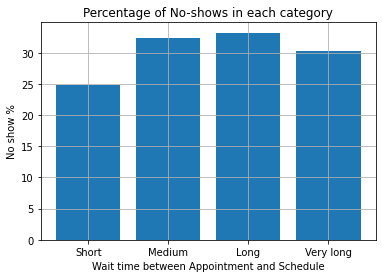

In [30]:
no_show_wait_values = raw_df.groupby(['No_show', 'Wait_Categ']).count()['Age']
#to get % of the noshows for each category
no_show_perc = no_show_wait_values[1][['Short', 'Medium', 'Long', 'Very long']]
show_perc = no_show_wait_values[0][['Short', 'Medium', 'Long', 'Very long']]
difference = (no_show_perc/(no_show_perc+show_perc))*100

labels = ['Short', 'Medium', 'Long', 'Very long']
plt.bar([1,2,3,4], difference)
plt.xticks(ticks=[1,2,3,4], labels=labels)
plt.xlabel('Wait time between Appointment and Schedule')
plt.ylabel('No show %')
plt.title("Percentage of No-shows in each category");
plt.grid();

#### It seems that wait time affects patients not showing to the appointment

### Research Question 3: Patients with history of Alcoholism resulted in No-Shows?

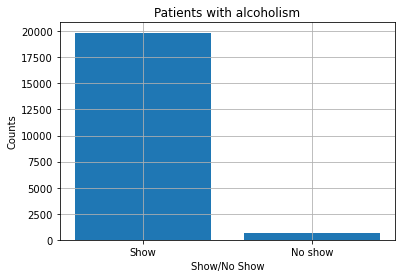

In [31]:
no_show_alcoholism = raw_df[raw_df['No_show'] == 1].groupby('Alcoholism').count().iloc[:, 0]
plt.bar([1,2], no_show_alcoholism, tick_label=['Show', 'No show'])
plt.title('Patients with alcoholism');
plt.grid();
plt.xlabel('Show/No Show');
plt.ylabel('Counts');

#### It seems that patients with alcoholism are more inclined to show to the appointment

### Research Question 4: Diabetes patients most likely having No-Shows?

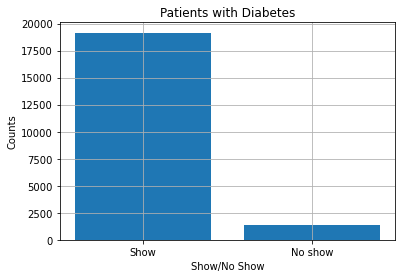

In [32]:
no_show_diabetes = raw_df[raw_df['No_show'] == 1].groupby('Diabetes').count().iloc[:, 0]
plt.bar([1,2], no_show_diabetes, tick_label=['Show', 'No show'])
plt.title('Patients with Diabetes');
plt.grid();
plt.xlabel('Show/No Show');
plt.ylabel('Counts');

#### It seems that patients with diabetes are more inclined to show to the appointment

### Research Question 5: Hypertension patients most likely having a No-Show?

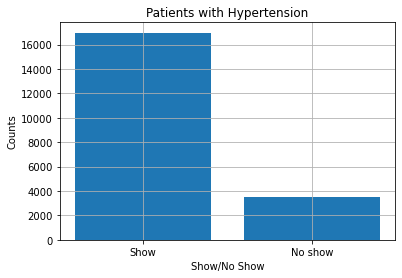

In [33]:
no_show_hypertension = raw_df[raw_df['No_show'] == 1].groupby('Hypertension').count().iloc[:, 0]
plt.bar([1,2], no_show_hypertension, tick_label=['Show', 'No show'])
plt.title('Patients with Hypertension');
plt.grid();
plt.xlabel('Show/No Show');
plt.ylabel('Counts');

#### It seems that patients with hypertension are more inclined to show to the appointment

### Research Question 6: Does sending a reminder through an SMS before the appointment affect No-show frequency?

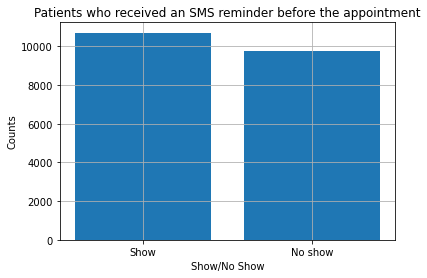

In [34]:
no_show_sms = raw_df[raw_df['No_show'] == 1].groupby('SMS_received').count().iloc[:, 0]
plt.bar([1,2], no_show_sms, tick_label=['Show', 'No show'])
plt.title('Patients who received an SMS reminder before the appointment');
plt.grid();
plt.xlabel('Show/No Show');
plt.ylabel('Counts');

#### It seems that receiving a reminder SMS would not affect showing up to the appointment

### Research Question 7: Patients that have a scholarship will most likely No-show as they are not paying full expense?

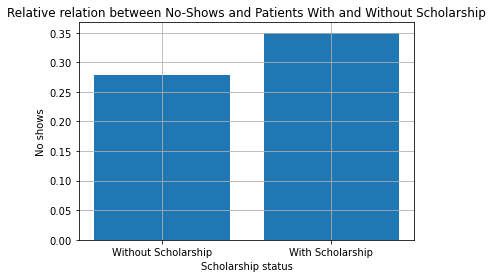

In [35]:
no_show_scholarship = raw_df[raw_df['No_show'] == 1].groupby('Scholarship').count().iloc[:, 0]
no_show_scholarship = no_show_scholarship / raw_df.groupby('Scholarship').count().iloc[:, 0]

plt.bar([1,2], no_show_scholarship, tick_label=['Without Scholarship', 'With Scholarship'])
plt.title('Relative relation between No-Shows and Patients With and Without Scholarship');
plt.grid()
plt.xlabel('Scholarship status');
plt.ylabel('No shows');

#### It seems that patients with scholarships are more inclined to not show to the appointment

## Considering the age groups as follows:
#### 1- Infants (Age 0-12)
#### 2- Teenagers (Age 13-21)
#### 3- Adults (Age 22-59)
#### 4- Seniors (Age 60+)

In [36]:
def age_group(years):
    if 0 <= years < 12:
        return 'Infant'
    elif years < 21:
        return 'Teenage'
    elif years < 59:
        return 'Adult'
    else:
        return 'Senior'

In [37]:
raw_df['Age_group'] = raw_df['Age'].apply(age_group)

### Research Question 8: Which Age group would most likely result in a No-Show?

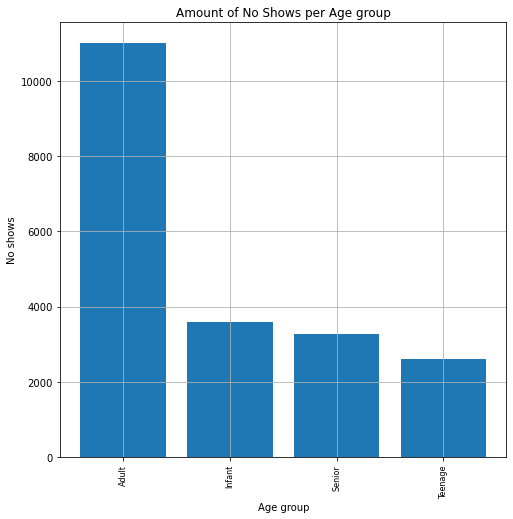

In [38]:
no_show_age = raw_df[raw_df['No_show'] == 1].groupby('Age_group').count()['Age'].sort_values(ascending=False)

plt.figure(figsize = (8,8));
plt.bar(no_show_age.index,no_show_age);
#titles' cluttered, we need to rotate it 90 deg.
plt.xticks(rotation=90,fontsize= 8);
plt.title('Amount of No Shows per Age group');
plt.grid();
plt.xlabel('Age group');
plt.ylabel('No shows');

#### It seems that Adults are more inclined to not show to the appointment

### Research Question 9: The appointment being a weekday or weekend affects the frequency of No-shows?

In [39]:
#convert to weekday
raw_df['ScheduledDay_weekday'] = raw_df['ScheduledDay'].apply(lambda x: x.strftime("%A"))

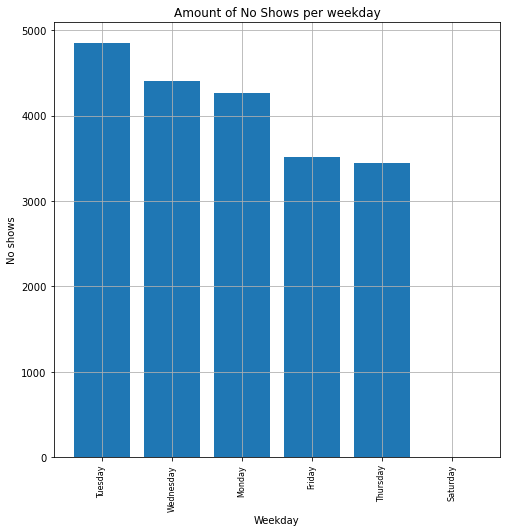

In [40]:
no_show_weekday = raw_df[raw_df['No_show'] == 1].groupby('ScheduledDay_weekday').count()['Age'].sort_values(ascending=False)
plt.figure(figsize = (8,8));
plt.bar(no_show_weekday.index,no_show_weekday);
plt.xticks(rotation=90,fontsize= 8);
plt.title('Amount of No Shows per weekday');
plt.grid();
plt.xlabel('Weekday');
plt.ylabel('No shows');

#### It seems that almost all appointments on Saturday are not a No_show

### Research Question 10: Appointment time (early morning or night) affects the amount of No-shows? (before 12 pm and after 6 pm)

In [41]:
def time_categ(time):
    if 6 <= time < 12:
        return 'Morning'
    elif 18 <= time < 24 :
        return 'Night'
    else:
        return 'Inbetween'

In [42]:
#Extract hours:
raw_df['ScheduledDay_hours'] = raw_df.ScheduledDay.dt.hour
raw_df['ScheduledDay_Day_Night'] = raw_df['ScheduledDay_hours'].apply(time_categ)

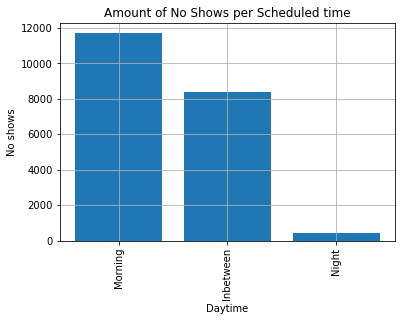

In [43]:
no_show_sched_time = raw_df[raw_df['No_show'] == 1].groupby('ScheduledDay_Day_Night').count()['Age'].sort_values(ascending=False)

plt.figure();
plt.bar(no_show_sched_time.index,no_show_sched_time);
#titles' cluttered, we need to rotate it 90 deg.
plt.xticks(rotation=90);
plt.title('Amount of No Shows per Scheduled time');
plt.grid();
plt.xlabel('Daytime');
plt.ylabel('No shows');

#### It seems that patients don't miss their appointments if it is at night. I think the reason is that he appointment is after regular jobs working hours

### Research Question 11: Location of the hospital affects the amount of No-shows? (Accessability)

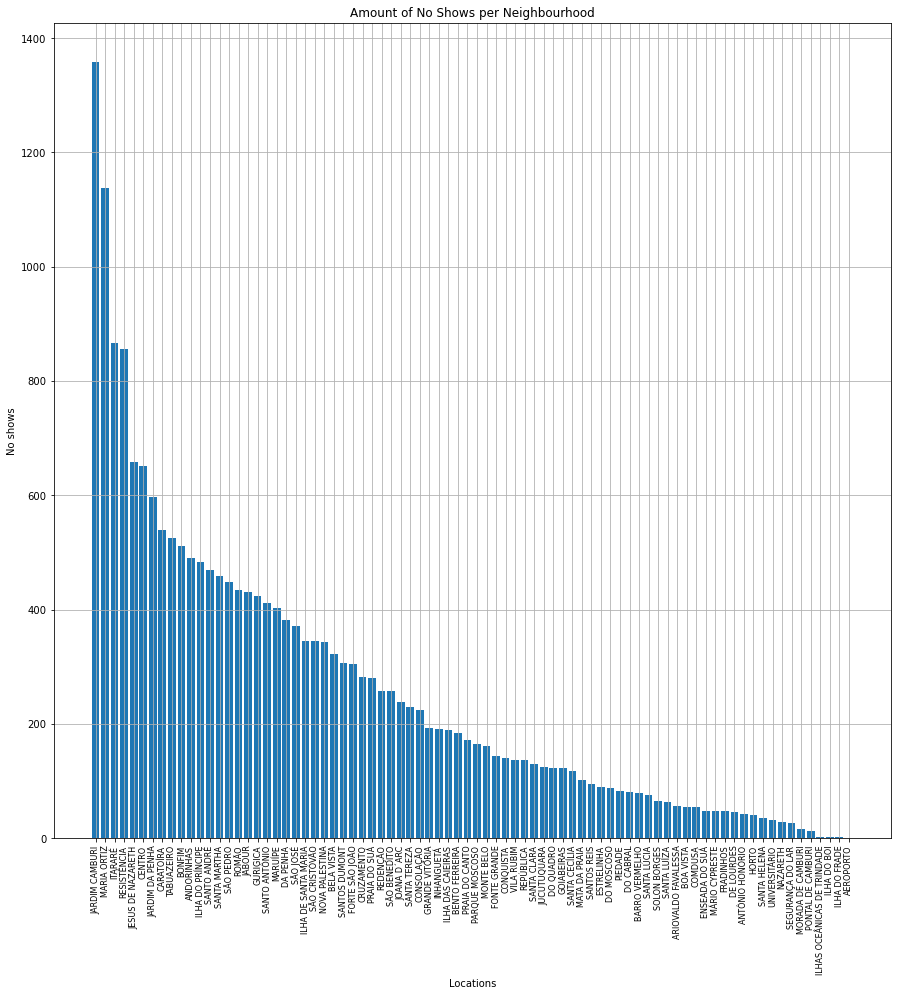

In [44]:
neighbourhoods = raw_df[raw_df['No_show'] == 1].groupby('Neighbourhood').count()['Age'].sort_values(ascending=False)

plt.figure(figsize = (15,15));
plt.bar(neighbourhoods.index,neighbourhoods);
#titles' cluttered, we need to rotate it 90 deg.
plt.xticks(rotation=90,fontsize= 8);
plt.title('Amount of No Shows per Neighbourhood');
plt.xlabel('Locations');
plt.ylabel('No shows');
plt.grid();

#### It seems that 'Jardim Camburi', 'Maria Ortiz' and 'Itarare' have the most numbers of noshows, most likely due to accessibility and transportation. On the other hand, 'Aeroporto', 'Ilha do frade' and 'Ilhas Oceanicas De Trindade' have the least numbers of no-shows, thus, convenient to reach and accessible for everyone.It seems that patients with diabetes are more inclined to show to the appointment

### Research Question 12: Which age group are most likely to apply for a scholarship?

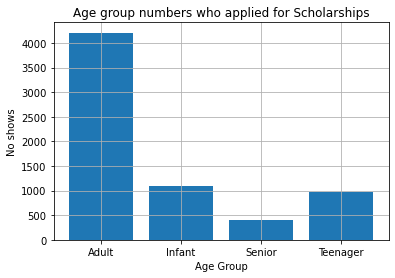

In [45]:
Age_group_scholarship = raw_df[raw_df['Scholarship'] == 1].groupby('Age_group').count().iloc[:, 0]
Age_group_scholarship
plt.bar([1,2,3,4], Age_group_scholarship, tick_label=['Adult', 'Infant','Senior','Teenager'])
plt.title('Age group numbers who applied for Scholarships');
plt.grid();

plt.xlabel('Age Group');
plt.ylabel('No shows');

#### It seems that Adults are most likely to have scholarships.

### Research Question 13: What is the relation between Age and the patient having hypertension/diabetes/alcoholism?

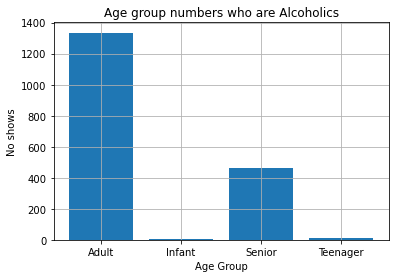

In [46]:
Age_group_alcoholism = raw_df[raw_df['Alcoholism'] == 1].groupby('Age_group').count().iloc[:, 0]
Age_group_alcoholism
plt.bar([1,2,3,4], Age_group_alcoholism, tick_label=['Adult', 'Infant','Senior','Teenager'])
plt.title('Age group numbers who are Alcoholics');
plt.grid();

plt.xlabel('Age Group');
plt.ylabel('No shows');

#### It seems that Majority of people suffering from alcoholism are 'Adults'.

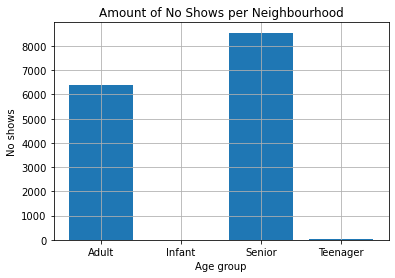

In [47]:
Age_group_Hypertension = raw_df[raw_df['Hypertension'] == 1].groupby('Age_group').count().iloc[:, 0]
Age_group_Hypertension
plt.bar([1,2,3,4], Age_group_Hypertension, tick_label=['Adult', 'Infant','Senior','Teenager'])
plt.title('Age group numbers who suffer from Hypertension');
plt.grid();
plt.title('Amount of No Shows per Neighbourhood');
plt.xlabel('Age group');
plt.ylabel('No shows');

#### It seems that Majority of the people suffering from Diabetes are Seniors.

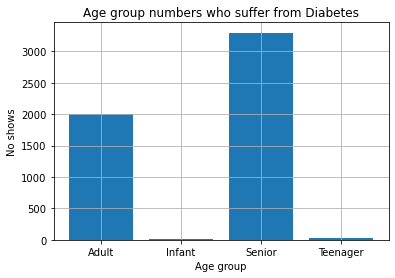

In [48]:
Age_group_Diabetes = raw_df[raw_df['Diabetes'] == 1].groupby('Age_group').count().iloc[:, 0]
Age_group_Diabetes
plt.bar([1,2,3,4], Age_group_Diabetes, tick_label=['Adult', 'Infant','Senior','Teenager'])
plt.title('Age group numbers who suffer from Diabetes');
plt.grid();
plt.xlabel('Age group');
plt.ylabel('No shows');

####  However, It seems that the majority of Both Seniors and Adults are suffering Hypertension.

### Research Question 14: Location of the hospital affects the amount of No-shows for seniors? (Accessability)

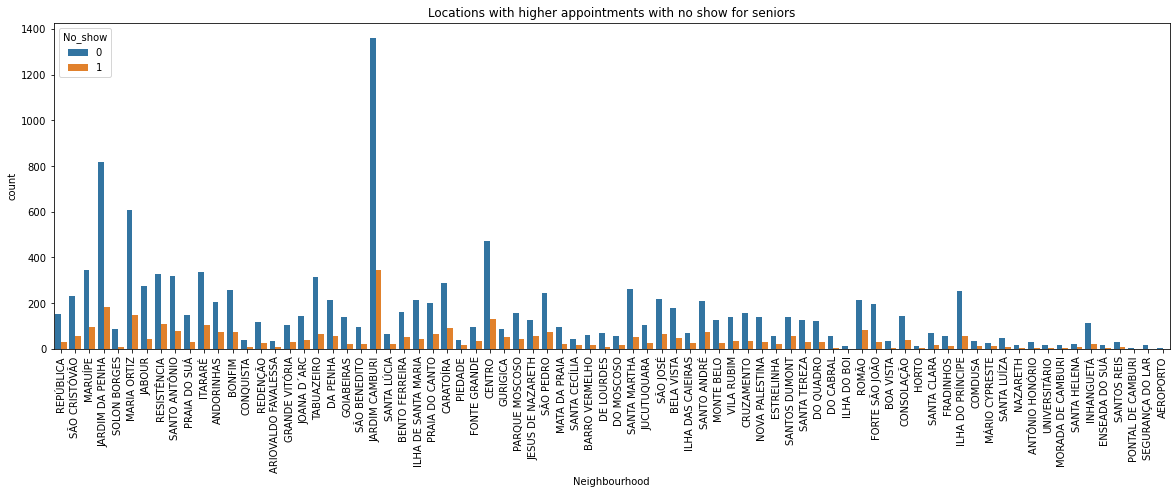

In [49]:
neighbourhoods_seniors_no_show = raw_df[raw_df['No_show'] == 1].groupby(['Neighbourhood', 'Age_group']).count()['Gender']
#I don't really know how to plot this properly 
#Can you help please?
#Create a new df for seniors:

df_senior = raw_df.drop(raw_df[raw_df['Age_group'] != 'Senior'].index)
plt.figure(figsize=(20,6))
plt.title('Locations with higher appointments with no show for seniors')
plt.xticks(rotation=90)
sns.countplot(x=df_senior['Neighbourhood'], data=df_senior, hue='No_show');


#### That means that JARDIM CAMBURI, JARDIM DA PENHA and MARIA ORTIZ neighbourhoods might have an accessiblity for seniors. requires further investigation

### Research Question 15: Location of the hospital affects the amount of No-shows for Handicapped? (Accessability)

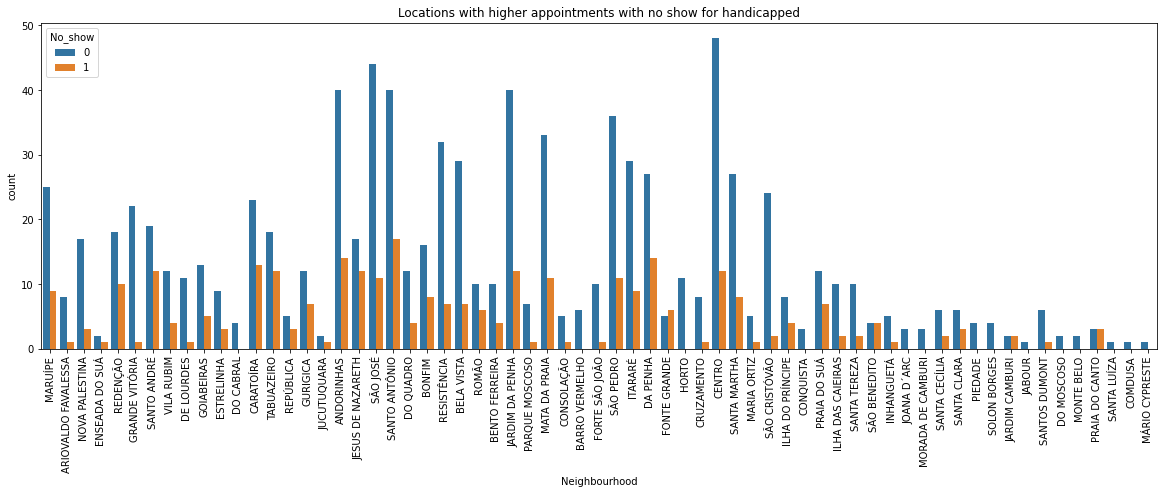

In [50]:
neighbourhoods_handicap_no_show = raw_df[raw_df['No_show'] == 1].groupby(['Neighbourhood' ,'Handicap']).count()['Gender']
#I don't really know how to plot this properly 
#Can you help please?
#Create a new df for Handicapped only

df_handicap = raw_df.drop(raw_df[raw_df['Handicap'] != 1].index)
plt.figure(figsize=(20,6))
plt.title('Locations with higher appointments with no show for handicapped')
plt.xticks(rotation=90)
sns.countplot(x=df_handicap['Neighbourhood'], data=df_handicap, hue='No_show');


#### We notice that there is a handicap inaccessibility for some locations like SANTO ANTONIO, ANDORINIHAS and DA PENHA. Therefore these places need to check for accessibility for disabled.

### Research Question 16: Which variable has the most numbers of No_shows?

<ipython-input-51-cef8a8557411>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_new = raw_df.groupby('No_show')['Scholarship', 'Hypertension','Diabetes', 'Alcoholism', 'Handicap', 'SMS_received'].sum()


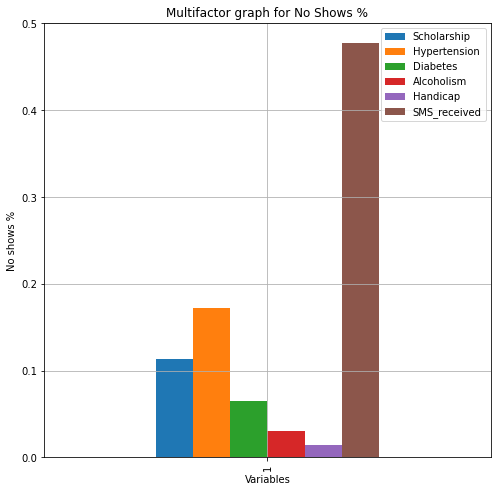

In [51]:
#I don't really know how to plot this properly 
#Can you help please?
df_new = raw_df.groupby('No_show')['Scholarship', 'Hypertension','Diabetes', 'Alcoholism', 'Handicap', 'SMS_received'].sum()
multivar_noshow = df_new.query("No_show == 1")
noshow_total = raw_df['No_show'].value_counts()[1]
multivar = multivar_noshow / noshow_total
multivar.plot(kind='bar',figsize=(8,8),title='Multifactor graph for No Shows %');
plt.grid();
plt.xlabel('Variables');
plt.ylabel('No shows %');

#### This is the corelation between NO_SHOWS and all 6 variables discussed.
We noticed that SMS_received has the most % of No shows in all the variables

### let's check what has the most correlation to No_shows

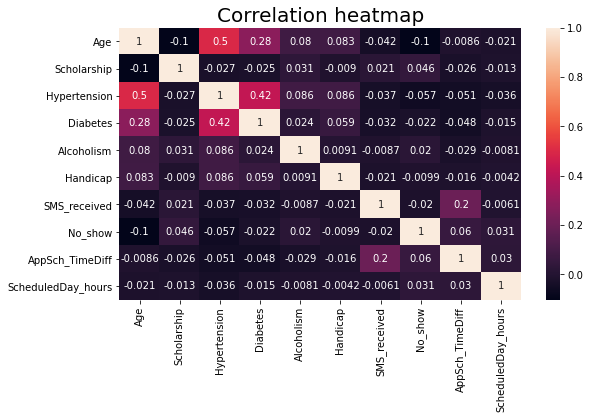

In [52]:
plt.figure(figsize=(9,5))
sns.heatmap(raw_df.corr().round(6), annot = True)
plt.title('Correlation heatmap', size='20')
plt.xticks(rotation='90');

#### We noticed that the most correlation to No show was patients who have hypertension.

<a id='conclusions'></a>
## Conclusions

### After examining the data, we discovered the following findings:


>**Research Question 1: Which Gender is most likely to have a No-Show?**<br>
Females are most likely to not show to an appointment than Males. But this doesn't imply a proper causation. We don't really know the exact reasoning per say.<br>
******************************************************************************************************************************** 

>**Research Question 2: Is Time waited after scheduling related to No-Shows?**<br>
We discovered that the longer the waiting time the patient has to wait for, the higher the probability of not showing for an appointment.<br> 
********************************************************************************************************************************
>**Research Question 3: Patients with history of Alcoholism resulted in No-Shows?**<br>
>**Research Question 4: Diabetes patients most likely having No-Shows?**<br>
>**Research Question 5: Hypertension patients most likely having a No-Show?**<br>
People with history with Alcoholism, Hypertension and diabetes are more likely to show up to the appointment probably related to following up on some accompaning health effects, they need the constant follow up.<br>
********************************************************************************************************************************
>**Research Question 6: Does sending a reminder through an SMS before the appointment affect No-show frequency?**<br>
Looks like whether an SMS was sent before the appointment or not, there is still a significant no-shows, thus, it is not an affecting factor.<br>
********************************************************************************************************************************
>**Research Question 7: Patients that have a scholarship will most likely No-show as they are not paying full expense?**<br>
The results show that people with scholarships has a bigger % of noshows. most likely because they are not paying full price for the appointment, thus care less.<br>
********************************************************************************************************************************
>**Research Question 8: Which Age group would most likely result in a No-Show?**<br>
Adults are the most likely category for a No-show due to having a busy life as well as work commitment.<br>
********************************************************************************************************************************
>**Research Question 9: The appointment being a weekday or weekend affects the frequency of No-shows?**<br>
It seems that there is an almost even distribution of noshows along the weekdays except for Saturday where this is only 1 no-show in the whole data set. It means that during weekdays, people are quite busy and on Sunday, people are tired and preparing for Monday for work.<br>
********************************************************************************************************************************
>**Research Question 10: Appointment time (early morning or night) affects the amount of No-shows? (before 12 pm and after 6 pm)**<br>
We noticed that the amount of no-shows of Night appointments are quite less than the rest of the day. It means that people would rather not miss appointments if it is after work time. <br>
********************************************************************************************************************************
>**Research Question 11: Location of the hospital affects the amount of No-shows? (Accessability)**<br>
It seems that 'Jardim Camburi', 'Maria Ortiz' and 'Itarare' have the most numbers of noshows, most likely due to accessibility and transportation.
On the other hand, 'Aeroporto', 'Ilha do frade' and 'Ilhas Oceanicas De Trindade' have the least numbers of no-shows, thus, convenient to reach and accessible for everyone.<br>
********************************************************************************************************************************
>**Research Question 12: Which age group are most likely to apply for a scholarship?**<br>
Adults are most likely to have scholarships.<br>
********************************************************************************************************************************
>**Research Question 13: What is the relation between Age and the patient having hypertension/diabetes/alcoholism?**<br>
Majority of people suffering from alcoholism are 'Adults'. Majority of the people suffering from Diabetes are Seniors. However, the majority of Both Seniors and Adults are suffering Hypertension.<br>
********************************************************************************************************************************
>**Research Question 14: Location of the hospital affects the amount of No-shows for seniors? (Accessability)**<br>
That means that JARDIM CAMBURI, JARDIM DA PENHA and MARIA ORTIZ neighbourhoods might have an accessiblity for seniors. requires further investigation.<br>
********************************************************************************************************************************
>**Research Question 15: Location of the hospital affects the amount of No-shows for Handicapped? (Accessability)**<br>
We notice that there is a handicap inaccessibility for some locations like SANTO ANTONIO, ANDORINIHAS and DA PENHA. Therefore these places need to check for accessibility for disabled.<br>
********************************************************************************************************************************
>**Research Question 16: Which variable has the most numbers of No_shows?**<br>
We noticed that SMS_received has the most % of No shows in all the variables.<br>
********************************************************************************************************************************

## Limitations:
##### Requires further investigation on the Work status of the individuals (Student, Employee, etc..)
##### Requires further investigation on the reason behind some of the Neighbourhoods having many no-shows (Accessibility for Seniors and Handicapped, etc.)